# Project: Investigate a No Show Medical Appointments Dataset

## Table of Contents
<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#summary">Summary</a></li>
</ul>

<a id="introduction"></a>
## Introduction

>The dataset under investigation is a collection of information from 100k medical appointments scheduled in Brazil. The main objective of this data analysis is to find whether patients who scheduled appointment actually showed up or not.

>With the given characteristics like gender, age, scholarship and health profile of every patient such as hipertension, alcoholism, diabetes, handcap, I'm interested in investigating the below questions - 
### Questions:
<ul>
    <li>Which gender type has the highest number of no-shows?</li>
    <li>What is the patient age distribution of no-shows versus shows?</li>
    <li>What are the trends associated with a patient health profile and shows versus no-shows?</li>
    <li>Which neighborhoods have the highest number of no-shows?</li>
    <li>Do no-shows have a larger time gap between scheduled date and appointment date?</li>
    <li>Are people receiving SMS are more likely to show up?</li>
</ul>

<a id="wrangling"></a>
## Data Wrangling

>Data wrangling cleans and unifies the messy and complex data sets for easier access and analysis

#### Steps to data wrangling (as per out dataset)
<ul>
    <li>Data Acquisition: Identifying and obtaining access to the data source</li>
    <li>Data Cleansing: Redesigning the data into a usable/functional format and correct/remove any bad data</li>
</ul>

In [914]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

### Data Aquisition:

In [915]:
# load data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Cleaning:

In [916]:
df.shape

(110527, 14)

In [917]:
# check for duplicates and drop them if any
print(sum(df.duplicated()))

0


In [918]:
# rename column names
df.rename(columns={'PatientId': 'patient_id', 'AppointmentID': 'appointment_id', 'Gender': 'gender', 
                   'ScheduledDay': 'scheduled_day','AppointmentDay': 'appointment_day','Age': 'age', 
                   'Neighbourhood': 'neighbourhood', 'Scholarship': 'scholarship', 'Hipertension': 'hypertension',
                   'Handcap': 'handicap', 'Diabetes': 'diabetes', 'Alcoholism': 'alcoholism', 
                   'SMS_received': 'sms_received', 'No-show': 'no_show'
                  }, inplace=True)

In [919]:
# converting the data types and formats
df['patient_id'] = df['patient_id'].astype(int)

In [920]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [921]:
# Adding format to the appointment and scheduled days
df['scheduled_day'] = df['scheduled_day'].apply(lambda x: x.strftime("%Y-%m-%d"))
df['appointment_day'] = df['appointment_day'].apply(lambda x: x.strftime("%Y-%m-%d"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [922]:
# convert them back to datetime object
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [923]:
# checking for erroneous data
print('Age:',sorted(df.age.unique()))
print('Gender:',df.gender.unique())
print('Diabetes:',df.diabetes.unique())
print('Alcoholism:',df.alcoholism.unique())
print('Hypertension:',df.hypertension.unique())#Hypertension
print('Handicap:',df.handicap.unique())#Handicap
print('Scholarship:',df.scholarship.unique())
print('SMS_received:',df.sms_received.unique())
print('No_show:',df.no_show.unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Diabetes: [0 1]
Alcoholism: [0 1]
Hypertension: [1 0]
Handicap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]
No_show: ['No' 'Yes']


In [924]:
# removing the outliers
df = df[(df['age'] >= 0) & (df['age'] <= 100)]
df.shape

(110519, 14)

<a id="eda"></a>
## Exploratory Data Analysis:

>Now that the data is trimmed and cleaned, let's move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that are posed in the Introduction section is the goal of this section. Each question is taken considering to solve for one variable at a time.


### Question 1: Which gender type has the highest number of no-shows?

In [925]:
# group by gender and count the shows and no shows
gender_data = df.groupby('gender').no_show.value_counts()
gender_data

gender  no_show
F       No         57241
        Yes        14591
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

In [926]:
# print gender anaylsis data
def print_no_shows_data():
    total = len(df.index)
    female_percent = (gender_data['F']['Yes']/total) * 100
    male_percent = (gender_data['M']['Yes']/total) * 100
    print("{}% of females did not show up to the appointment".format(female_percent.round(2)))
    print("{}% of males didn't show up to the appointment.".format(male_percent.round(2)))
print_no_shows_data()

13.2% of females did not show up to the appointment
6.99% of males didn't show up to the appointment.


In [927]:
# print gender anaylsis data
def print_show_data():
    total = len(df.index)
    female_percent = (gender_data['F']['No']/total) * 100
    male_percent = (gender_data['M']['No']/total) * 100
    print("{}% of females showed up for their appointment.".format(female_percent.round(2)))
    print("{}% of males showed up for their appointment".format(male_percent.round(2)))
print_show_data()

51.79% of females showed up for their appointment.
28.02% of males showed up for their appointment


Text(0,0.5,'Number of appointments')

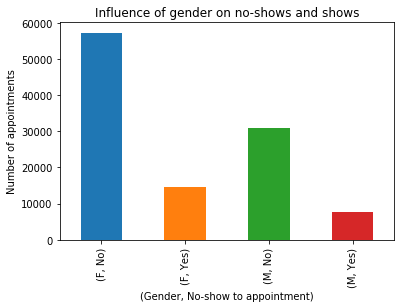

In [981]:
# plot the graph
gender_data.plot(kind='bar', autoplot=)
plt.title('Influence of gender on no-shows and shows')
plt.xlabel('(Gender, No-show to appointment)')
plt.ylabel('Number of appointments')

#### Conclusion: 
From the visualization it is pretty much clear that this distribution is skewed towards women. Though women are likely to show up to their appointment, the no-shows percent of both male and women doesn’t vary too much. Apparently, gender has no influence on proportion of no-shows

### Question 2: What is the patient age distribution of no-shows versus shows?

In [929]:
# creating age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df['age_bins'] = pd.cut(df.age, age_bins)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_bins
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,"(60, 70]"
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,"(50, 60]"
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,"(60, 70]"
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,"(0, 10]"
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,"(50, 60]"


In [930]:
# filter by no-shown appointments
no_shown_age_data = df.query('no_show == "Yes"').groupby('age_bins').no_show.value_counts()
no_shown_age_data

age_bins   no_show
(0, 10]    Yes        3149
(10, 20]   Yes        3308
(20, 30]   Yes        3394
(30, 40]   Yes        3232
(40, 50]   Yes        2870
(50, 60]   Yes        2721
(60, 70]   Yes        1648
(70, 80]   Yes         889
(80, 90]   Yes         407
(90, 100]  Yes          59
Name: no_show, dtype: int64

In [931]:
age_no_shown_proportion = {}
for index in range(0,len(age_bins)-1):
    key = "({},{}]".format(age_bins[index], age_bins[index+1])
    value = no_shown_age_data.values[index]
    age_no_shown_proportion.update({key: value})
age_no_shown_proportion

{'(0,10]': 3149,
 '(10,20]': 3308,
 '(20,30]': 3394,
 '(30,40]': 3232,
 '(40,50]': 2870,
 '(50,60]': 2721,
 '(60,70]': 1648,
 '(70,80]': 889,
 '(80,90]': 407,
 '(90,100]': 59}

In [932]:
# calculate percentage by age_bins of no-shown
def print_no_shown_age_percentage():
    total = len(df.index)
    for key, value in age_no_show_proportion.items():
        percent = (value/total) * 100
        print("{}% are in bin-{}".format(percent.round(2), key))
print_no_shown_age_percentage()

2.85% are in bin-(0,10]
2.99% are in bin-(10,20]
3.07% are in bin-(20,30]
2.92% are in bin-(30,40]
2.6% are in bin-(40,50]
2.46% are in bin-(50,60]
1.49% are in bin-(60,70]
0.8% are in bin-(70,80]
0.37% are in bin-(80,90]
0.05% are in bin-(90,100]


Text(0,0.5,'Number of appointments')

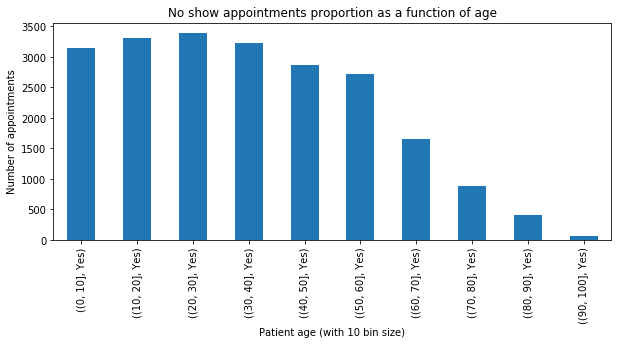

In [933]:
# plot a graph of no-shown as a function of age
no_shown_age_data.plot(kind='bar', figsize=(10,4), color="#2077B4")
plt.title('No show appointments proportion as a function of age')
plt.xlabel('Patient age (with 10 bin size)')
plt.ylabel('Number of appointments')

In [934]:
# filter by shown appointments
shown_age_data = df.query('no_show == "No"').groupby('age_bins').no_show.value_counts()
shown_age_data

age_bins   no_show
(0, 10]    No         12061
(10, 20]   No          9791
(20, 30]   No         10389
(30, 40]   No         11820
(40, 50]   No         11550
(50, 60]   No         12940
(60, 70]   No          9541
(70, 80]   No          4832
(80, 90]   No          2137
(90, 100]  No           242
Name: no_show, dtype: int64

In [935]:
age_shown_proportion = {}
for index in range(0,len(age_bins)-1):
    key = "({},{}]".format(age_bins[index], age_bins[index+1])
    value = shown_age_data.values[index]
    age_shown_proportion.update({key: value})
age_shown_proportion

{'(0,10]': 12061,
 '(10,20]': 9791,
 '(20,30]': 10389,
 '(30,40]': 11820,
 '(40,50]': 11550,
 '(50,60]': 12940,
 '(60,70]': 9541,
 '(70,80]': 4832,
 '(80,90]': 2137,
 '(90,100]': 242}

In [936]:
# calculate percentage by age_bins of shown
def print_shown_age_percentage():
    total = len(df.index)
    for key, value in age_shown_proportion.items():
        percent = (value/total) * 100
        print("{}% are in bin-{}".format(percent.round(2), key))
print_shown_age_percentage()

10.91% are in bin-(0,10]
8.86% are in bin-(10,20]
9.4% are in bin-(20,30]
10.69% are in bin-(30,40]
10.45% are in bin-(40,50]
11.71% are in bin-(50,60]
8.63% are in bin-(60,70]
4.37% are in bin-(70,80]
1.93% are in bin-(80,90]
0.22% are in bin-(90,100]


Text(0,0.5,'Number of appointments')

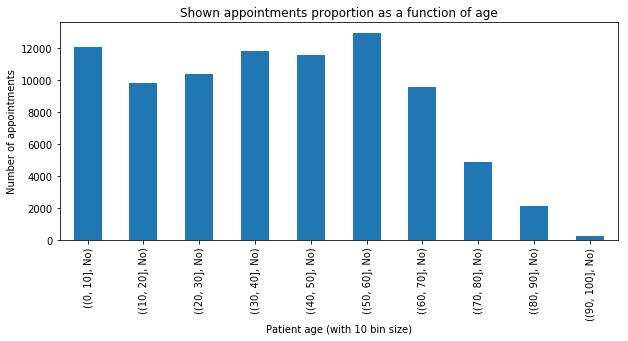

In [937]:
# plot a graph of shows as a function of age
shown_age_data.plot(kind='bar', figsize=(10,4), color="#2077B4")
plt.title('Shown appointments proportion as a function of age')
plt.xlabel('Patient age (with 10 bin size)')
plt.ylabel('Number of appointments')

#### Conclusion: 
The number of no-shows were increasing till the age bin - (20,30] and then they had started decreasing. This doesn’t clearly depicts how the age was influencing the no-shows proportion. Similarly with the shown appointments, there doesn’t seem to be any trends associated.

### Question 3: What are the trends associated with a patient health profile and shows versus no-shows?

In [938]:
# filter by no-shown appointments and health profile
hypertension_data = df.groupby('hypertension').no_show.value_counts()
diabetes_data = df.groupby('diabetes').no_show.value_counts()
alcoholism_data = df.groupby('alcoholism').no_show.value_counts()
hypertension_data, diabetes_data, alcoholism_data,

(hypertension  no_show
 0             No         70175
               Yes        18544
 1             No         18028
               Yes         3772
 Name: no_show, dtype: int64, diabetes  no_show
 0         No         81690
           Yes        20886
 1         No          6513
           Yes         1430
 Name: no_show, dtype: int64, alcoholism  no_show
 0           No         85520
             Yes        21639
 1           No          2683
             Yes          677
 Name: no_show, dtype: int64)

In [939]:
# explore the trends  and calculate the percentages of patients of no-shown appointments
ns_yes_df = df.query('no_show == "Yes"')
ns_percentages = []
def print_no_show_health_stats(value, h_type):
    percent = ((value/len(ns_yes_df.index)) * 100).round(2)
    ns_percentages.append([h_type, percent])
    print("{} patients i.e, {}% who didn't show up to appointment are associated with {}\n".format(
        value, percent, h_type))
    
print_no_show_health_stats(hypertension_data[1]['Yes'], 'hypertension')
print_no_show_health_stats(diabetes_data[1]['Yes'], 'diabetes')
print_no_show_health_stats(alcoholism_data[1]['Yes'], 'alcoholism')

3772 patients i.e, 16.9% who didn't show up to appointment are associated with hypertension

1430 patients i.e, 6.41% who didn't show up to appointment are associated with diabetes

677 patients i.e, 3.03% who didn't show up to appointment are associated with alcoholism



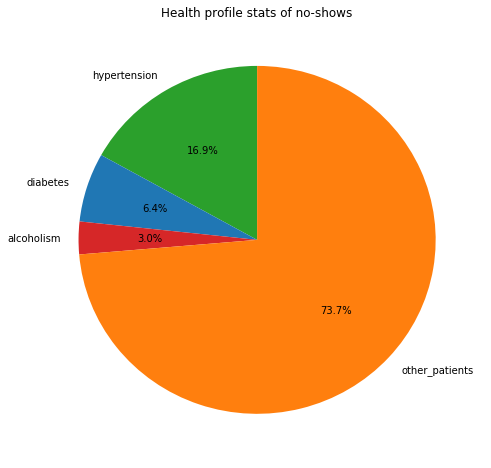

In [940]:
# plot a chart of health profile stats of no-shows
other_patients = 100 - (ns_percentages[0][1] + ns_percentages[1][1] + ns_percentages[2][1])
values = [ns_percentages[0][1], ns_percentages[1][1], ns_percentages[2][1], other_patients]
labels = ['hypertension', 'diabetes', 'alcoholism', 'other_patients']
colors = ['#2BA02C', '#2077B4', '#D62728', '#FF7F0E']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Health profile stats of no-shows') 
fig = plt.gcf()
fig.set_size_inches(8,8);

In [941]:
# explore the trends  and calculate the percentages of patients of shown appointments
ns_no_df = df.query('no_show == "No"')
s_percentages = []
def print_show_health_stats(value, h_type):
    percent = ((value/len(ns_no_df.index)) * 100).round(2)
    s_percentages.append([h_type, percent])
    print("{} patients i.e, {}% who showed up to appointment are associated with {}\n".format(value, percent, h_type))
    
print_show_health_stats(hypertension_data[1]['No'], 'hypertension')
print_show_health_stats(diabetes_data[1]['No'], 'diabetes')
print_show_health_stats(alcoholism_data[1]['No'], 'alcoholism')

18028 patients i.e, 20.44% who showed up to appointment are associated with hypertension

6513 patients i.e, 7.38% who showed up to appointment are associated with diabetes

2683 patients i.e, 3.04% who showed up to appointment are associated with alcoholism



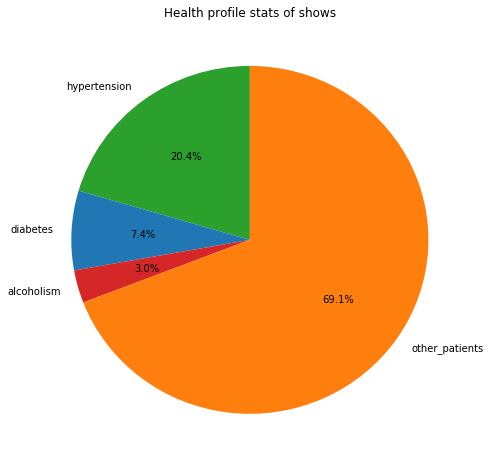

In [942]:
# plot a chart of health profile stats of no-shows
other_patients = 100 - (s_percentages[0][1] + s_percentages[1][1] + s_percentages[2][1])
values = [s_percentages[0][1], s_percentages[1][1], s_percentages[2][1], other_patients]
labels = ['hypertension', 'diabetes', 'alcoholism', 'other_patients']
colors = ['#2BA02C', '#2077B4', '#D62728', '#FF7F0E']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Health profile stats of shows') 
fig = plt.gcf()
fig.set_size_inches(8,8);

In [983]:
# consolidated stats of health profile influence on patients when appointments are considered
def print_health_profile_stats(is_associated, data, no_show, h_type):
    value = data[is_associated][no_show]
    percent = ((value/len(df.index)) * 100).round(2)
    
    if is_associated and no_show:
        print("{} patients i.e, {}% didn't show up to appointment and are associated with {}\n".format(
            value, percent, h_type))
        
    elif is_associated and not no_show:
        print("{} patients i.e, {}% did show up to appointment and are associated with {}".format(
            value, percent, h_type))
        
    elif not is_associated and no_show:
        print("{} patients i.e, {}% didn't show up to appointment and are not associated with {}".format(
            value, percent, h_type))
        
    else:
        print("--------------------------------------------- {} --------------------------------------".format(h_type))
        print("{} patients i.e, {}% did show up to appointment are not associated with {}".format(
            value, percent, h_type))

In [984]:
# 0 denotes they didn't show up i.e, - Yes
# 1 denotes they showed up i.e, - No

# hypertension stats
print_health_profile_stats(0, hypertension_data, 0, 'hypertension')
print_health_profile_stats(1, hypertension_data, 0, 'hypertension')
print_health_profile_stats(0, hypertension_data, 1, 'hypertension')
print_health_profile_stats(1, hypertension_data, 1, 'hypertension')

# diabetes stats
print_health_profile_stats(0, diabetes_data, 0, 'diabetes')
print_health_profile_stats(1, diabetes_data, 0, 'diabetes')
print_health_profile_stats(0, diabetes_data, 1, 'diabetes')
print_health_profile_stats(1, diabetes_data, 1, 'diabetes')

# alcoholism stats
print_health_profile_stats(0, alcoholism_data, 0, 'alcoholism')
print_health_profile_stats(1, alcoholism_data, 0, 'alcoholism')
print_health_profile_stats(0, alcoholism_data, 1, 'alcoholism')
print_health_profile_stats(1, alcoholism_data, 1, 'alcoholism')

--------------------------------------------- hypertension --------------------------------------
70175 patients i.e, 63.5% did show up to appointment are not associated with hypertension
18028 patients i.e, 16.31% did show up to appointment and are associated with hypertension
18544 patients i.e, 16.78% didn't show up to appointment and are not associated with hypertension
3772 patients i.e, 3.41% didn't show up to appointment and are associated with hypertension

--------------------------------------------- diabetes --------------------------------------
81690 patients i.e, 73.91% did show up to appointment are not associated with diabetes
6513 patients i.e, 5.89% did show up to appointment and are associated with diabetes
20886 patients i.e, 18.9% didn't show up to appointment and are not associated with diabetes
1430 patients i.e, 1.29% didn't show up to appointment and are associated with diabetes

--------------------------------------------- alcoholism -------------------------

In [1022]:
# stats of patients who has hypertension = 1 and alcoholism = 1
data = df.query('hypertension == 1')
data = data.query('alcoholism == 1')
grouped_data = data.groupby('no_show').no_show.count()

In [1023]:
def print_health_stats(no_show):
    value = grouped_data[no_show]
    percent = (value/len(data.index)) * 100
    if no_show == "Yes":
        print("{}% of patients with hypertension and alocoholim are no-shows".format(percent.round(2)))
    else:
        print("{}% of patients with hypertension and alcoholism are shows".format(percent.round(2)))

In [1024]:
print_health_stats("Yes")
print_health_stats("No")

18.39% of patients with hypertension and alocoholim are no-shows
81.61% of patients with hypertension and alcoholism are shows


#### Conclusion:
    
The health profile of patients doesn’t seem to have much influence on showing up to appointment or not. Patients with hypertension have 16.9% no-show rate and 20% show rate which is not a significant difference. Similarly with alcoholism and diabetes, their proportions doesn’t seem to vary significantly. 

But when the combined stats are analysed, it seems like patients with hypertension are more likely to not show up than diabetic patients and diabetic patients are more likely to not show up than alcoholic patients.


### Question 4: Which neighbourhoods have the highest number of no-shows?

In [945]:
no_shows = df.query('no_show == "Yes"').groupby('neighbourhood').no_show.count()
no_shows.sort_values(ascending=False, inplace=True)

Text(0,0.5,'Number of appointments')

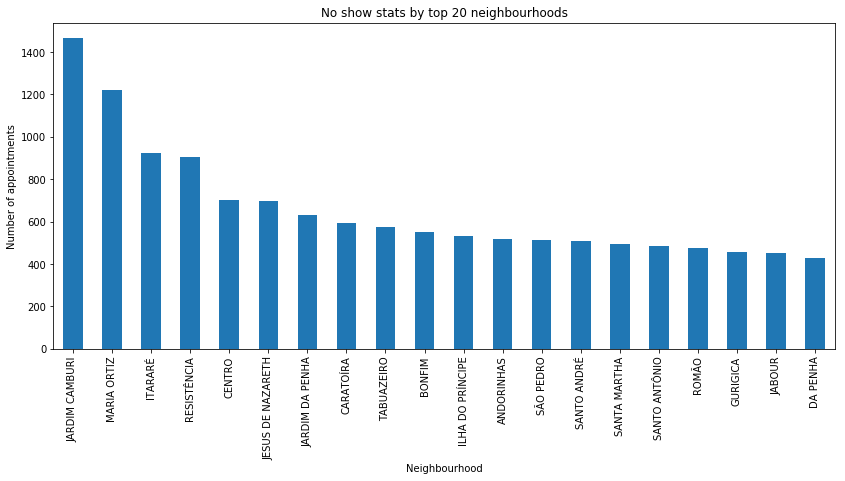

In [946]:
# plotting the data of top 20 neighbourhoods so that count of them can be seen clearly
values = no_shows[:20]
labels = no_shows.index[:20]
values.plot(kind="bar", x=labels, figsize=(14,6), color="#2077B4")
plt.title("No show stats by top 20 neighbourhoods")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of appointments")

Text(0,0.5,'Number of appointments')

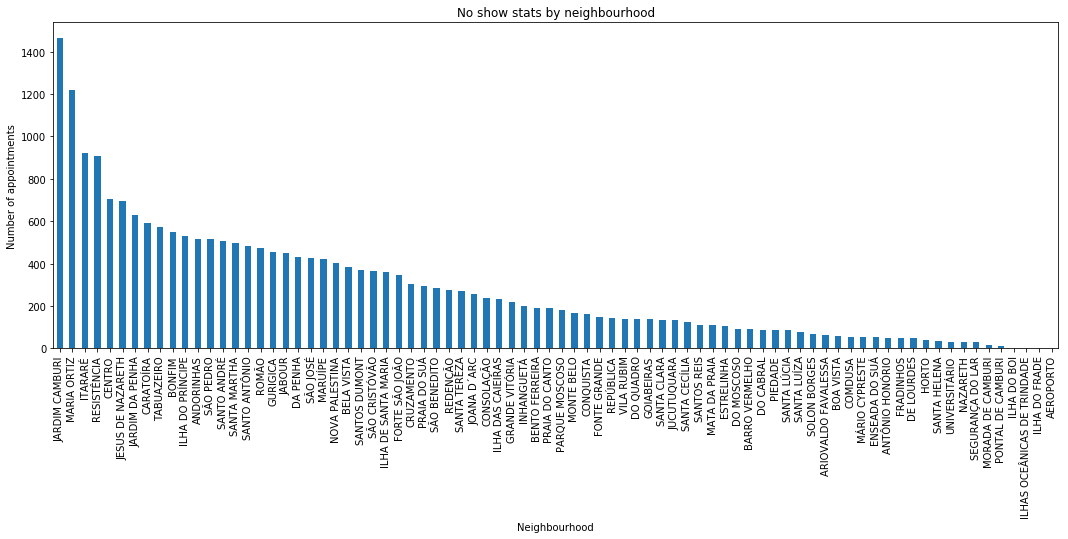

In [947]:
labels = no_shows.index
no_shows.plot(kind="bar", x=labels, figsize=(18,6), color="#2077B4")
plt.title("No show stats by neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of appointments")

#### Conclusion:
Conclusion: The graph clearly depicts that few neighbourhoods are more likely to escape from their appointments than others. Obviously, this counts as a major factor that influence no-shows

### Question 5: Do no-shows have a larger time gap between scheduled date and appointment date?

In [948]:
# calculate the amount of diffrence between appointment and scheduled day and drop the incorrect data
df['days_between'] = df['appointment_day'] - df['scheduled_day']
df['days_between'] = df['days_between'].dt.days
days_between_df = df.drop(df.index[df['days_between'] < 0])
days_between_df = days_between_df[['no_show', 'days_between']].groupby('days_between').count()

Text(0,0.5,'Number of appointments')

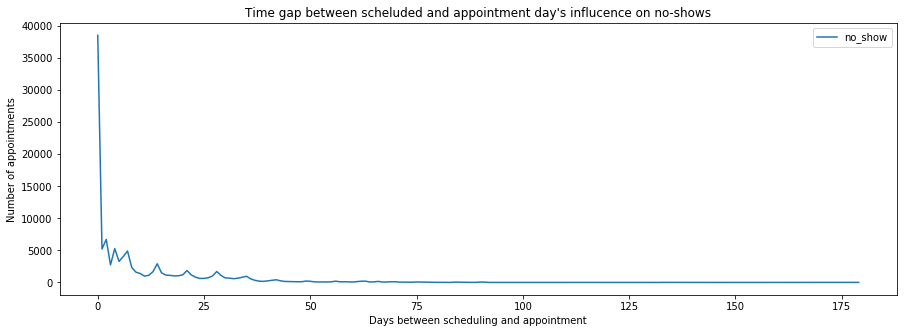

In [949]:
days_between_df.plot(kind='line', figsize=(15,5))
plt.title("Time gap between scheluded and appointment day's influcence on no-shows")
plt.xlabel('Days between scheduling and appointment')
plt.ylabel('Number of appointments')

#### Conclusion:
Patients are a lot more likely to show up when the appointment is scheduled on the same day.

### Question 6: Are people receiving SMS are more likely to show up?

In [975]:
# group by sms_received and count the shows and no shows
sms_trends_data = df.groupby('sms_received').no_show.value_counts()
sms_trends_data

sms_received  no_show
0             No         62506
              Yes        12532
1             No         25697
              Yes         9784
Name: no_show, dtype: int64

In [976]:
# print sms received anaylsis data
def print_no_shows_data():
    total = len(df.index)
    received_percent = (sms_trends_data[0]['Yes']/total) * 100
    not_received_percent = (sms_trends_data[1]['Yes']/total) * 100
    print("{}% of patients didn't receive SMS and didn't show up to the appointment".format(received_percent.round(2)))
    print("{}% of patients received SMS and didn't show up to the appointment.".format(not_received_percent.round(2)))
print_no_shows_data()

11.34% of patients didn't receive SMS and didn't show up to the appointment
8.85% of patients received SMS and didn't show up to the appointment.


In [977]:
# print sms received anaylsis data
def print_show_data():
    total = len(df.index)
    received_percent = (sms_trends_data[0]['No']/total) * 100
    not_received_percent = (sms_trends_data[1]['No']/total) * 100
    print("{}% of patients didn't receive SMS and showed up to the appointment".format(received_percent.round(2)))
    print("{}% of patients received SMS and showed up to the appointment".format(not_received_percent.round(2)))
print_show_data()

56.56% of patients didn't receive SMS and showed up to the appointment
23.25% of patients received SMS and showed up to the appointment


Text(0,0.5,'Number of appointments')

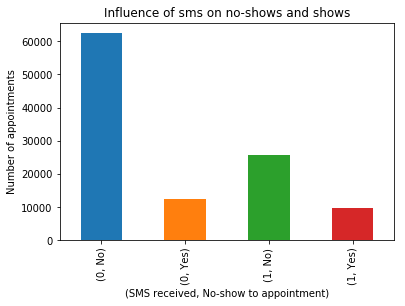

In [980]:
# plot the graph
sms_trends_data.plot(kind='bar')
plt.title('Influence of sms on no-shows and shows')
plt.xlabel('(SMS received, No-show to appointment)')
plt.ylabel('Number of appointments')

#### Conclusion:
Sending SMS hardly
Conclusion:  Apparently, SMS is not a major factor that is influencing the percentage of no-shows because patients without receiving SMS showed up to the appointment in a great proportion. Sending SMS doesn’t really help patients to show up. Therefore, SMS hardly has an effect on no-shows.

<a id="summary"></a>
## Summary

The main question was - What are the most important factors in determining the likelihood of a no-show? The most important factors were:

1. The time between the scheduled and appointment date. Patients are a lot more likely to show up when the appointment is scheduled on the same day.
2. The Neighbourhood - Few neighbourhoods have a high proportion of no-shows
